Text(0, 0.5, 'P-wave velocity (km/s)')

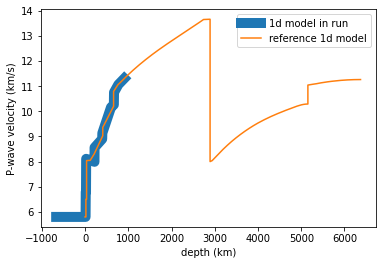

In [1]:
# plot 1d_model.txt
fname_gen='1d_model.txt'
fname_ori='1d_ak135.txt'

r_earth = 6371.0

# read file

dep_gen=[]
vp_gen=[]

with open(fname_gen, 'r') as f:
    lines = f.readlines()

    for line in lines:
        line = line.strip()
        if line.startswith('#'):
            continue
        else:
            line = line.split(",")
            dep_gen.append(r_earth-float(line[0]))
            vp_gen.append(float(line[1]))

dep_ori=[]
vp_ori=[]

with open(fname_ori,'r') as f:
    lines = f.readlines()

    for line in lines:
        line = line.strip()
        if line.startswith('#'):
            continue
        else:
            line = line.split(",")
            dep_ori.append(float(line[0]))
            vp_ori.append(float(line[1]))


# plot dep and vp
import matplotlib.pyplot as plt

plt.plot(dep_gen, vp_gen, linewidth=10, label="1d model in run")
plt.plot(dep_ori, vp_ori, label="reference 1d model")

plt.legend()
plt.xlabel("depth (km)")
plt.ylabel("P-wave velocity (km/s)")

In [2]:
# read 2D traveltime field and plot
import h5py
import matplotlib.pyplot as plt

fname_Tfield='OUTPUT_FILES/2D_TRAVEL_TIME_FIELD/2d_travel_time_field_0.h5'

with h5py.File(fname_Tfield, 'r') as f:
    T_2d = f['T'][:,:]
    t_1d = f['t'][:]
    r_1d = f['r'][:]

plt.imshow(T_2d, extent=[t_1d[0], t_1d[-1], r_1d[0], r_1d[-1]], aspect='auto')
plt.xlabel("epicentral distance (rad.)")
plt.ylabel("depth (km)")
plt.colorbar()
#plt.imshow(T_2d)


OSError: Unable to open file (unable to open file: name = 'OUTPUT_FILES/2d_travel_time_field_0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)